In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
#from sklearn.externals import joblib
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model, Sequential
from keras import regularizers, layers

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
df_source = pd.read_csv('/content/drive/MyDrive/dpc_dataset_csv/0.csv')
df_source.columns = ['x1','x2','x3','x4','x5','x6']
df_a=df_source.drop(['x1','x2'],axis=1)
df_a

,x3,x4,x5,x6
0,1008,1793,1466,1732
1,1039,1803,1494,1720
2,1072,1811,1522,1709
3,1105,1818,1551,1698
4,1138,1822,1579,1686
...,...,...,...,...
17776,1794,1310,1597,893
17777,1795,1307,1603,888
17778,1795,1305,1609,882
17779,1795,1302,1615,877


In [ ]:
merged_data = df_a
train = merged_data[0:10000]
test = merged_data[10000:17781]
print("Training dataset shape:", train.shape)
print("Test dataset shape:", test.shape)

Training dataset shape: (10000, 4)
Test dataset shape: (7781, 4)


In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train)
X_test = scaler.transform(test)
scaler_filename = "scaler_data"


In [ ]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
print("Training data shape:", X_train.shape)
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
print("Test data shape:", X_test.shape)

Training data shape: (10000, 1, 4)
Test data shape: (7781, 1, 4)


In [ ]:
model = Sequential()
model.add(LSTM(
        256,
        input_shape=(X_train.shape[1], X_train.shape[2]),
        return_sequences=True
    ))
model.add(Dropout(0.3))
model.add(LSTM(512, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(256))
model.add(Dense(256))
model.add(Dropout(0.3))
model.add(layers.Dense(X_train.shape[2], activation='relu'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop')

In [ ]:

model.compile(optimizer='adam', loss='mae')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 1, 256)            267264    
                                                                 
 dropout_3 (Dropout)         (None, 1, 256)            0         
                                                                 
 lstm_4 (LSTM)               (None, 1, 512)            1574912   
                                                                 
 dropout_4 (Dropout)         (None, 1, 512)            0         
                                                                 
 lstm_5 (LSTM)               (None, 256)               787456    
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dropout_5 (Dropout)         (None, 256)              

In [ ]:
nb_epochs = 100
batch_size = 10
history = model.fit(X_train, X_train, epochs=nb_epochs, batch_size=batch_size,
                    validation_split=0.05).history

Epoch 1/100
950/950 [==============================] - 41s 38ms/step - loss: 0.2611 - val_loss: 0.2391
Epoch 2/100
950/950 [==============================] - 40s 42ms/step - loss: 0.2565 - val_loss: 0.2325
Epoch 3/100
950/950 [==============================] - 35s 37ms/step - loss: 0.2565 - val_loss: 0.2219
Epoch 4/100
950/950 [==============================] - 33s 35ms/step - loss: 0.2565 - val_loss: 0.2215
Epoch 5/100
950/950 [==============================] - 34s 35ms/step - loss: 0.2561 - val_loss: 0.2293
Epoch 6/100
950/950 [==============================] - 34s 35ms/step - loss: 0.2558 - val_loss: 0.2448
Epoch 7/100
950/950 [==============================] - 37s 38ms/step - loss: 0.2560 - val_loss: 0.2287
Epoch 8/100
950/950 [==============================] - 33s 35ms/step - loss: 0.2556 - val_loss: 0.2308
Epoch 9/100
950/950 [==============================] - 33s 35ms/step - loss: 0.2554 - val_loss: 0.2239
Epoch 10/100
950/950 [==============================] - 33s 34ms/step - l

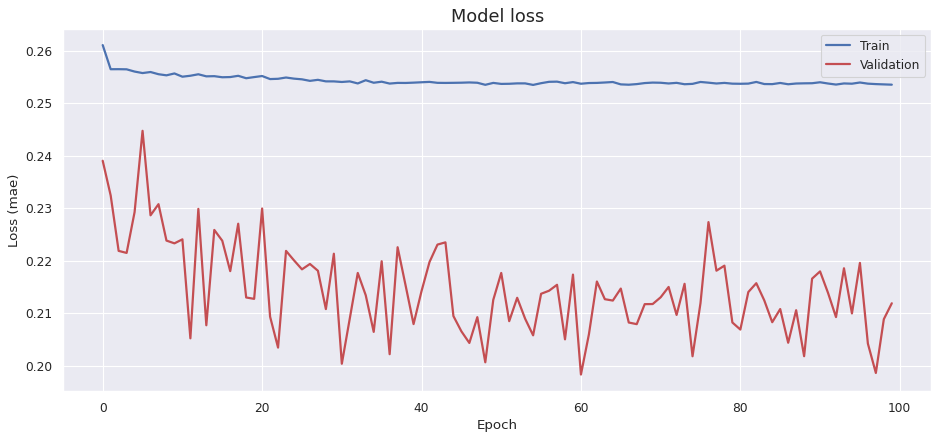

In [ ]:
xfig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

In [ ]:
X_pred = model.predict(X_train)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=train.columns)
X_pred.index = train.index

scored = pd.DataFrame(index=train.index)
Xtrain = X_train.reshape(X_train.shape[0], X_train.shape[2])
scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtrain), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,.5])

IndexError: ignored

In [ ]:
X_pred = model.predict(X_test)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=test.columns)
X_pred.index = test.index

In [ ]:
X_pred_train = model.predict(X_train)
X_pred_train = X_pred_train.reshape(X_pred_train.shape[0], X_pred_train.shape[2])
X_pred_train = pd.DataFrame(X_pred_train, columns=train.columns)
X_pred_train.index = train.index
Xtest = X_test.reshape(X_test.shape[0], X_test.shape[2])


In [ ]:
plt.plot(X_pred['x6'])
Target = []
Target2 = []
for i in range(0,7780):
  Target2.append(Xtest[i][3])
#  Target.append(Xtest[i][3])
plt.plot(Target2)
plt.plot(Target)

In [ ]:
plt.plot(Target)

In [ ]:
Xtest = X_test.reshape(X_test.shape[0], X_test.shape[2])
plt.plot(X_pred)

In [ ]:
plt.plot(test)